<h1 style="color:#D30982;">Summary</h1>

- Representing a quantum circuit
- Coding your first quantum circuit
- Making sense of the output/result of a quantum circuit
- Coding single qubit gates and circuits.

<h1 style="color:#D30982;">Your First Quantum Program</h1>

In order to write and run quantum programs, we make use of the Python package *qiskit*: this is developed by IBM and lets us build and run quantum circuits on IBM's very own quantum computer.

A very important thing to note is that you can also *simulate* quantum circuits of small enough size on classical computers (recall that performing quantum gates is nothing other than multiplying matrices by and vectors). Such calculations can certainly be performed by a classical computer! The catch is that they very quickly become intractable as the size of the quantum circuits being simulated grows. qiskit also provides a functionality for simulating quantum circuits. For learning purposes, and since we will be dealing mostly with very small quantum circuits, we will be performing a classical simulation of the quantum circuits we build. Running these programs on an actual quantum computer will be as simple as changing one argument in our code. 

Without further ado, let's build our first quantum circuit which does the following: starting from a qubit in the state $\left| 0 \right \rangle$, it creates an equal superposition of $\left| 0 \right \rangle$ and $\left| 1 \right \rangle$, and then measures the qubit. From the content of the last module, you should be able to guess that we can easily achieve this by initializing a qubit in the state $\left| 0 \right \rangle$, and applying a Hadamard gate to it.

Our first step is to import the Python class QuantumCircuit, from the qiskit package. We use this class to describe the quantum circuits we wish to execute, and to execute it.

In [1]:
from qiskit import QuantumCircuit, transpile
import qiskit

import numpy as np

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

An object in the `QuantumCircuit` is initialized by specifying a number of qubits for the quantum circuit, and a number of classical bits which will be used to store the outcome of later measurements. In the example below, the first argument '1' to `QuantumCircuit` specifies that we will be using just 1 qubit. The second argument '1' specifies that we will be storing a single classical bit of output from our future measurement.

In [2]:
circ = QuantumCircuit(1,1)  #create QuantumCircuit object
circ.h(0)  #add Hadamard gate to circuit

In the above line, circ is the circuit we just created, and we are inserting the Hadamard gate using `.h(0)`. The '0' in the argument specifies that we want the gate to be applied on the zeroth qubit (recall that numbering in Python starts at 0). At this point, our quantum circuit is ready. We can "draw" it by using the function 'draw'.

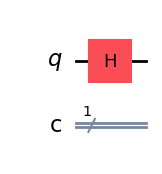

In [3]:
circ.draw("mpl") #draw circuit

We encourage you to play with the arguments of the above code snippets! For example, try creating and drawing a circuit with multiple qubits.

So far we have only drawn the quantum circuit. To actually run the circuit and measure requires additional code.  But before we run the circuit, we need to add a measurement command to the circuit. This is done using the function `measure`. The first argument specifies that we are measuring the zeroth qubit, and the second argument specifies that we are storing the output of this measurement in the zeroth output bit.

In [4]:
circ.measure(0,0) #add a measurement to the circuit

In [5]:
# Construct an ideal simulator
simulator = AerSimulator()

In [6]:
circ = transpile(circ, simulator) # run the simulation

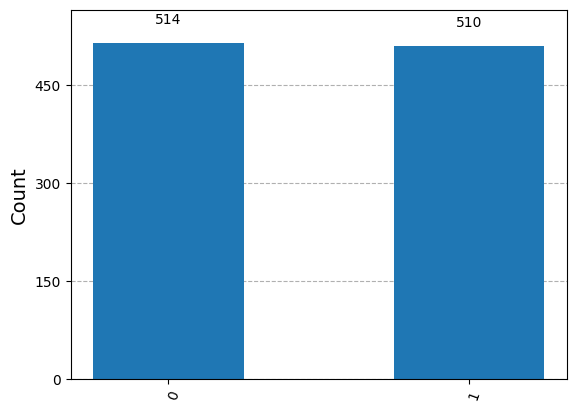

In [7]:
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)  #obtain the counts from the result object

<h1 style="color:#D30982;"> Another Quantum Program</h1>
Let's apply an $X$ gate instead of a $H$ gate. So, we start with the $\left| 0 \right\rangle$ state as before, but now we apply $X$ followed by a measurement. Before you run this circuit. Try to predict the resulting 'counts' you would see.

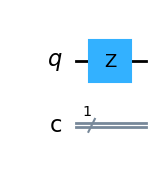

In [8]:
circ = QuantumCircuit(1,1)
circ.z(0)
circ.draw(output='mpl')

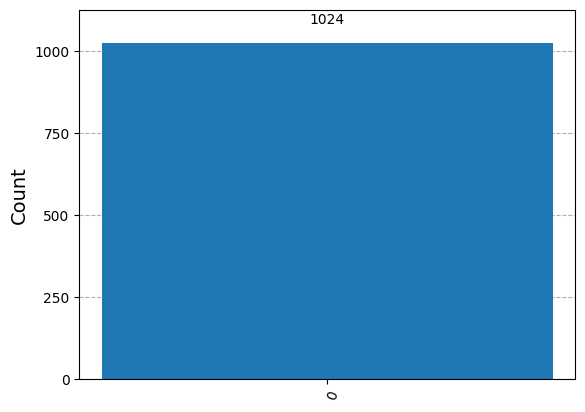

In [9]:
circ.measure(0,0)
circ = transpile(circ, simulator) # run the simulation

simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)

<font size=3 color=9A11DA>**Exercise.**</font> Write and run a program that starts with the state $\left| 0 \right\rangle$, applies the following sequence of gates $X$, $H$, $X$, $H$, and then measures. Estimate the probability of obtaining outcome '0'.

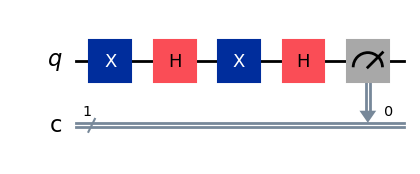

In [10]:
from qiskit import QuantumCircuit
circ=QuantumCircuit(1,1)

#your code here
circ.x(0)
circ.h(0) 
circ.x(0)
circ.h(0)
circ.measure(0,0)
circ.draw("mpl")

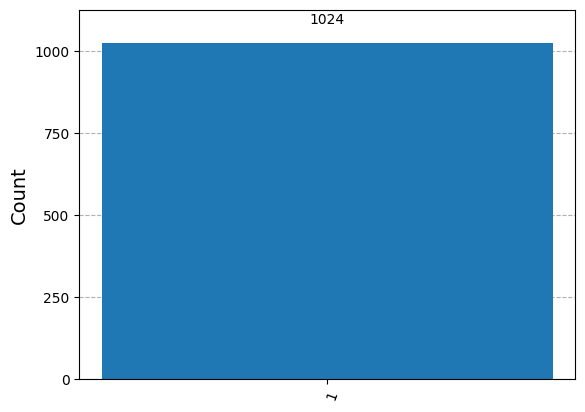

In [11]:
#execute the circuit
simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)

<font size=3 color=9A11DA>**Exercise.**</font> Write and run the program that starts with the state $\left| 0 \right\rangle$, applies the following sequence of gates $H$, $Z$, $H$, $Z$, $H$, and then measures. Estimate the probability of obtaining outcome '0'.

In [12]:
from qiskit import QuantumCircuit, Aer, execute

#your code here




ImportError: cannot import name 'Aer' from 'qiskit' (/home/jovyan/.qbraid/environments/qbraid_sdk_9j9sjy/pyenv/lib/python3.11/site-packages/qiskit/__init__.py)

<h2 style="color:#9A11DA;"> Playing With More Circuits</h2>

Single qubit circuits are a nice playground for you to learn and build some intuition for quantum computing. If you play around with these code snippets you might have a few 'Oh wait, I really thought I understood this' moments. We promise you that if each time you have such a moment you spend time straightening out your doubts, you will develop a much more solid understanding of quantum computing. You will also be more prepared to understand even more interesting stuff in the modules to come.

<h1 style="color:#D30982;"> Making Sense of Phases</h1>

If you start with the $\left| 0 \right\rangle$ state and apply an $H$ gate, then the state you get is 

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle+\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}.$$ 

If you start with $\left| 1 \right\rangle$ and apply an $H$ gate then you get: 

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle-\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}.$$ 

What is interesting is that, in both cases, if you measure the qubit after applying the $H$ gate, you obtain very similar results. We have run the first circuit earlier. Let's run the second one. 

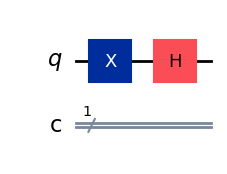

In [27]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
# Flip the initial 0 state to a 1 by applying an X gate
circ.x(0)
# Apply the Hadamard gate.
circ.h(0)
circ.draw(output='mpl')

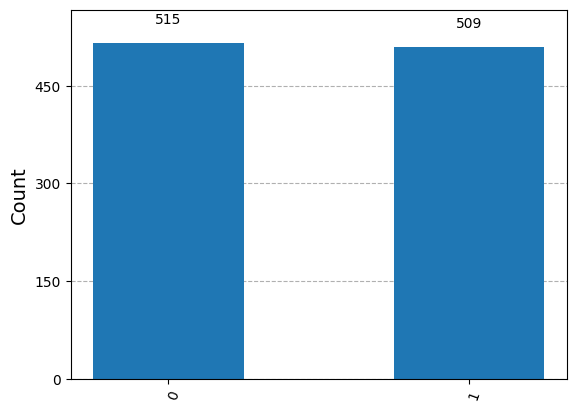

In [28]:
circ.measure([0],[0])

simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)

As you can see, we get the same distribution of results as from our very first quantum circuit. This should be no surprise, since Born's rule states that the probabilities of obtaining outcomes 0 and 1 are given by squaring the moduli of the amplitudes. In both the cases of

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle+\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}$$ 

and

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle-\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align},$$ 

one clearly obtains probabilites $\frac12$ and $\frac12$ for outcomes 0 and 1, respectively. You might wonder if there is a way we can distinguish the two states. 

We encourage you to think about this question, and to come up with a circuit that distinguishes these two states (before looking below for the answer!)

The answer is that the two states can be distinguished if one first performs additional quantum gates before measuring. The simplest such example is almost trivial: once the two states have been created, one can apply an additional Hadamard gate. So the two circuits are the following:

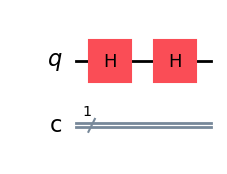

In [15]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
circ.h(0)

#Apply an additional Hadamard gate
circ.h(0)

circ.draw(output='mpl')

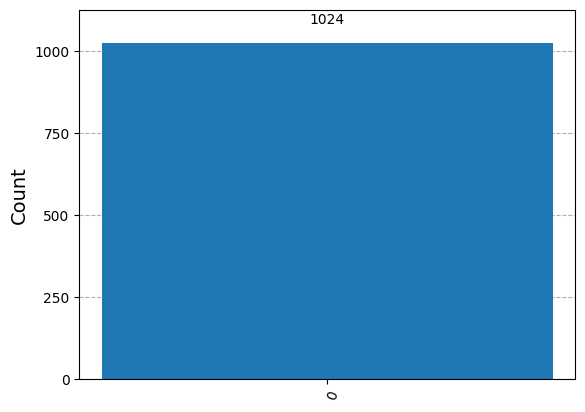

In [17]:
circ.measure([0],[0])
simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)


Now, we run the same circuit but starting from a qubit in the state $\left| 1\right\rangle$.

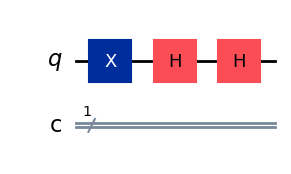

In [32]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
circ.x(0) # prepare a qubit in the state |1>
circ.h(0)

#Apply an additional Hadamard gate
circ.h(0)

circ.draw(output='mpl')

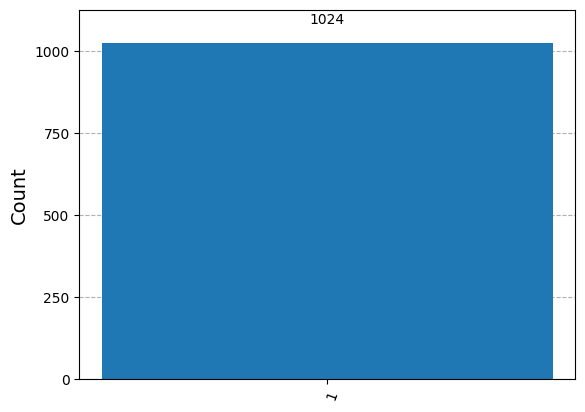

In [33]:
circ.measure([0],[0])
simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)

As you can see, the first circuit returns outcome 0 with certainty, while the second circuit returns outcome 1 with certainty. In other words, the two states above can be distinguished by applying a Hadamard gate, and then measuring. If you think a bit more about what is going on here, you will realize that the reason behind this is pretty clear. By applying a second Hadamard gate in the two circuits above, we are 'cancelling' the first Hadamard gate (because $H \cdot H$ equals the identity gate). Hence the first circuit is equivalent to an identity gate starting from $\left| 0\right\rangle$ (followed by a measurement), while the second is equivalent to an identity gate applied to $\left|1\right\rangle$, followed by a measurement. The first circuit obviously returns outcome 0 with certainty. The second circuit, returns outcome 1 with certainty.

If you are interested in a less 'trivial' example to distinguish the two states above, we encourage you to play with the gates that you have encountered in the previous module. 

Spoiler alert: it turns out that *most* gates will succeed at distinguishing the two states with significant statistical confidence!

<font size=3 color=9A11DA>**Exercise.**</font> So far, we have dealt with quantum circuits that only contain one qubit. Just to get our feet wet, let's look at a circuit with two qubits. Suppose we initialize two qubits, both in the state $\left|0\right>$, apply a Hadamard ($H$) gate to both qubits, and then measure both qubits. An example of this circuit is shown below. What are the possible outcomes of measuring both qubits? How likely are each of these outcomes? Run the code snippet below, which simulates this circuit below and observe the results. Did the answer match your predictions? (Hint: consider the measurement outcomes of each qubit individually first, and then consider the joint system. For two independent events with respective probabilities $p_1$ and $p_2$, the probability of both events occuring is $p_1 p_2$.)

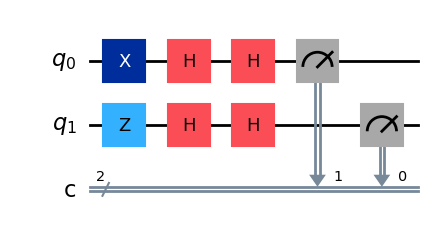

In [50]:


#create circuit and add gates
circ=QuantumCircuit(2,2)
circ.x(0)
circ.h(0)
circ.h(0)
circ.z(1)
circ.h(1)
circ.h(1)

#measure
circ.measure([0,1],[1,0])
circ.draw("mpl")


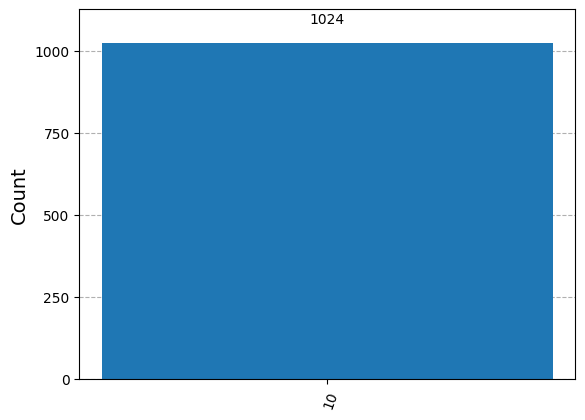

In [51]:
simulator = AerSimulator()
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
plot_histogram(counts)


As you can see, starting with two qubits and acting on them independently yields independent statistics, as you might have expected. In the next module, we will explore circuits of multiple qubits in much more detail. As you will see, the complexity and beauty of quantum computing emerges when we act on multiple qubits in such a way as to *entangle* or *correlate* them.

<h1 style="color:#D30982;">Schrodinger's Cat</h1>

As you build more intuition, we would like you to sometimes pause and reflect deeply about the understanding you are developing. For example, there is a good chance that you have heard of *Schrodinger's cat*, a famous thought experiment proposed by Erwin Schrodinger during the early development <!-- 192694292013 -->of quantum theory. At this time, scientists were just beginning to discover the strange and counterintuitive concepts behind the quantum world. They often used thought experiments to investigate and explain these surprising ideas. In this thought experiment, a cat is put in a box, and there is a mechanism to kill it (why would someone do that? It baffles us too!). That mechanism is triggered by the decay of a radioactive atom. Now, the state of a radioactive atom is in superposition of having decayed and not decayed. This is just like the state of the qubit, where 0 could represent 'not decay' and 1 could represent 'decay'. Does this mean that the cat is in a superposition of being 'dead' and 'alive'?

You see, even with single qubits, you can think of some 'interesting' experiments, if you just figure out a way to couple the output from a qubit's measurement to some macroscopic event.

<img src="images/schrodinger_cat.png" height="200" width="450" style='margin-left:auto;margin-right:auto;'/>

<h1 style="color:#D30982;">Review</h1>

The python package `qiskit` allows us to simulate quantum computers in python. Running a (simulation of) a quantum circuit requires the following steps:
- Import the necessary objects, including `QuantumCircuit`, `Aer`, and `execute`
- Create a `QuantumCircuit` object, specifying a number of qubits and a number of classical bits (to store future measurement outcomes)
- Add gates to the circuit
- Add a measurement
- Create a backend object that will execute the simulation
- Execute the circuit using the backend object
- Manipulate the outcome of the simulation to present it as desired (for example using histogram plots).